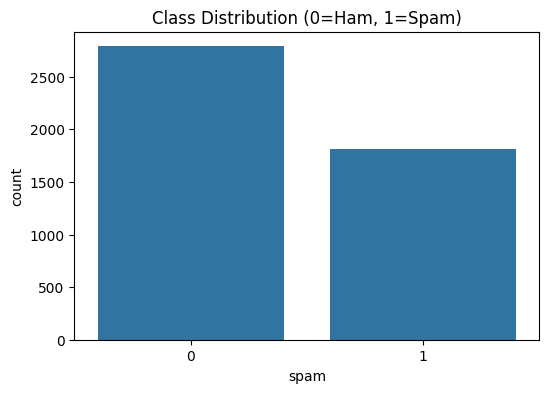

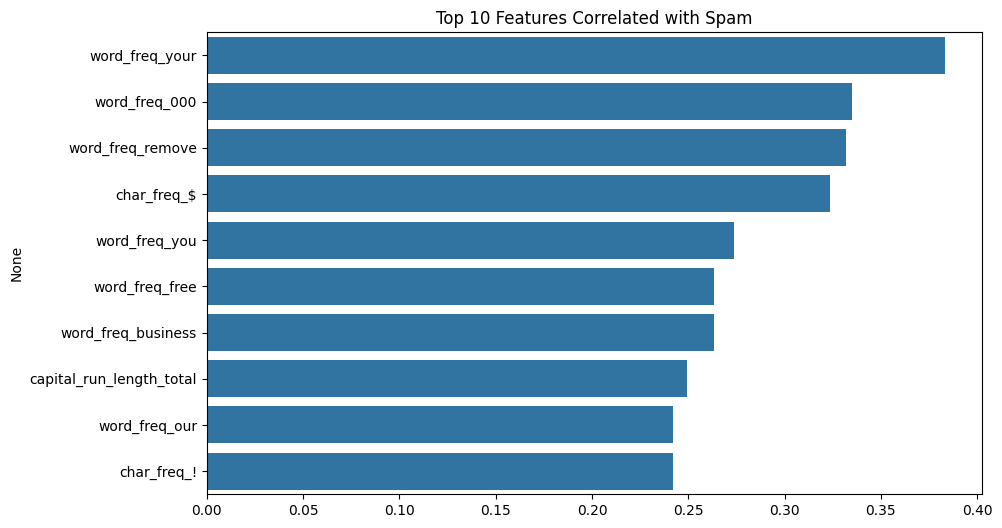

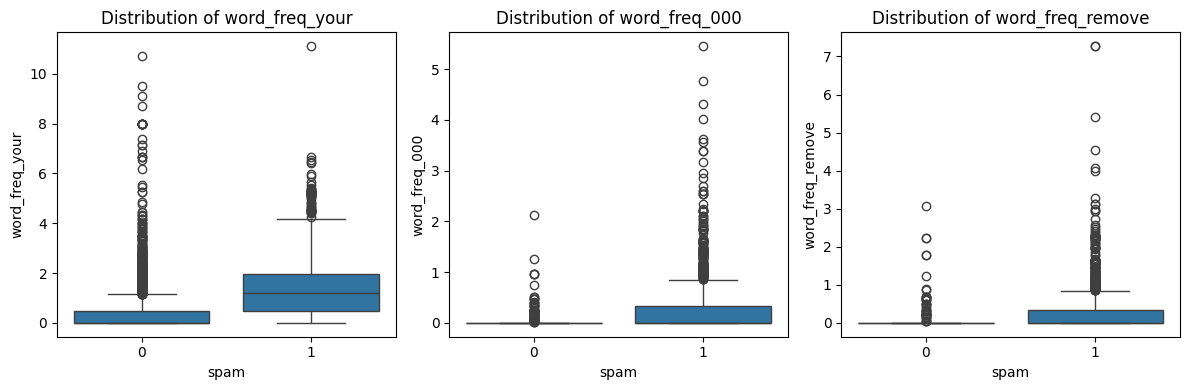


Naive Bayes Models:

Gaussian NB Results:
Accuracy: 0.8197
Precision: 0.7001
Recall: 0.9485
F1: 0.8056


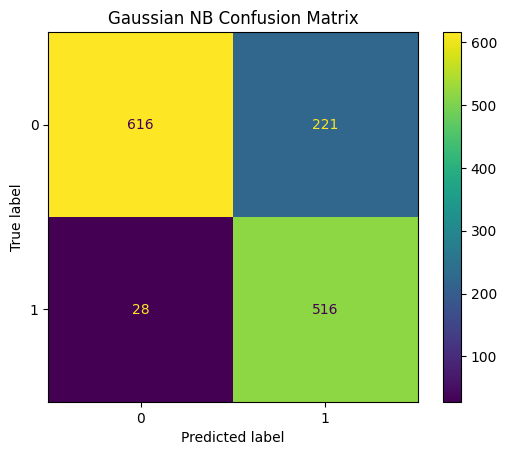

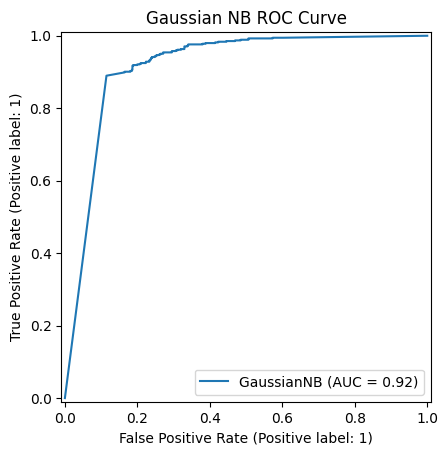


Multinomial NB Results:
Accuracy: 0.8950
Precision: 0.9424
Recall: 0.7812
F1: 0.8543


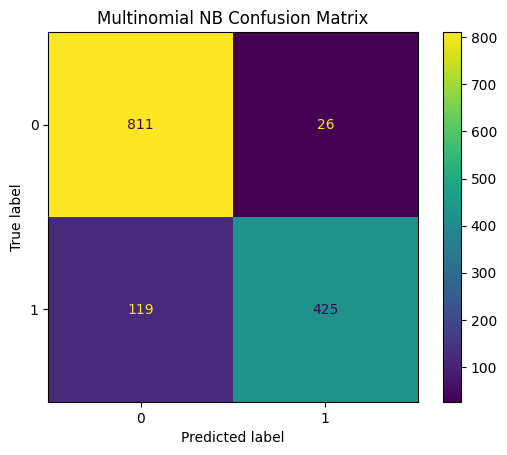

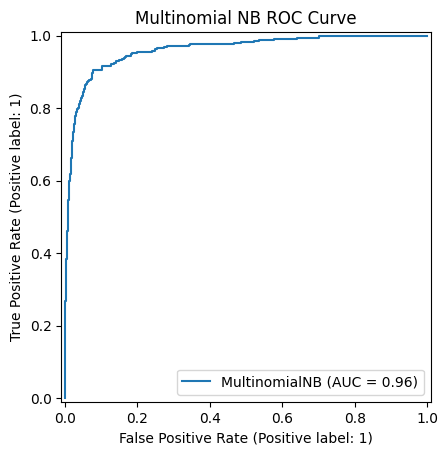


Bernoulli NB Results:
Accuracy: 0.8899
Precision: 0.8843
Recall: 0.8290
F1: 0.8558


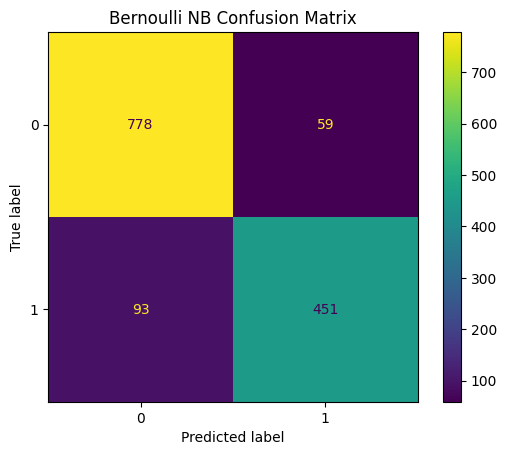

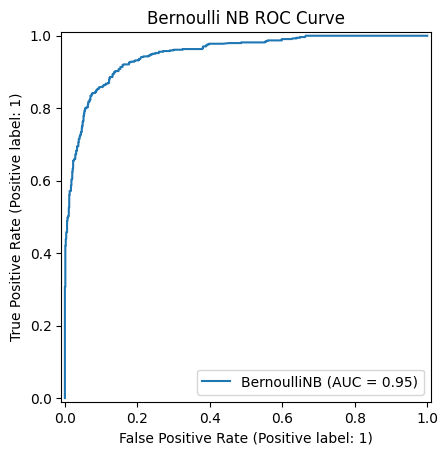


KNN Models:

KNN (k=1) Results:
Accuracy: 0.8899
Precision: 0.8551
Recall: 0.8676
F1: 0.8613


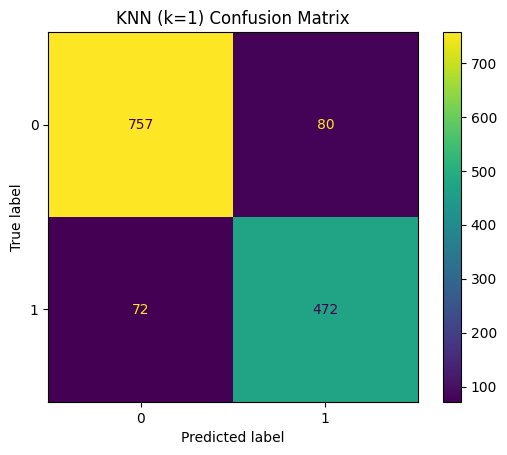

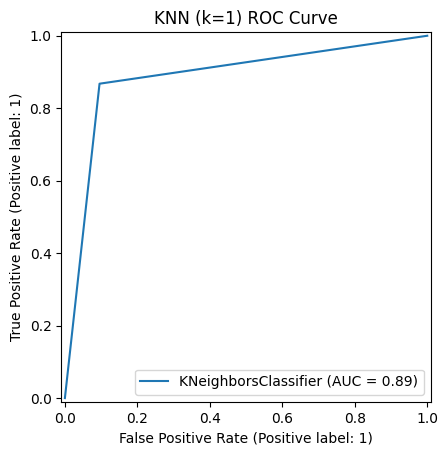


KNN (k=3) Results:
Accuracy: 0.8892
Precision: 0.8710
Recall: 0.8438
F1: 0.8571


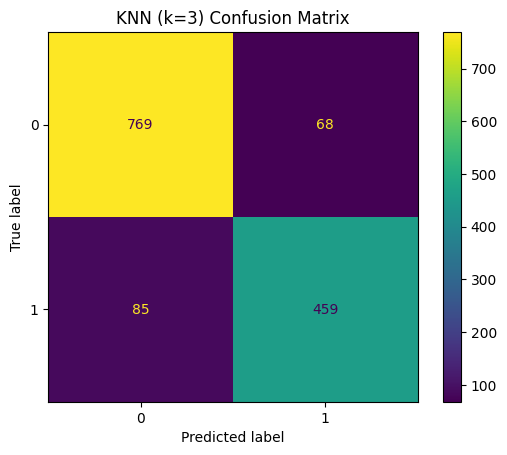

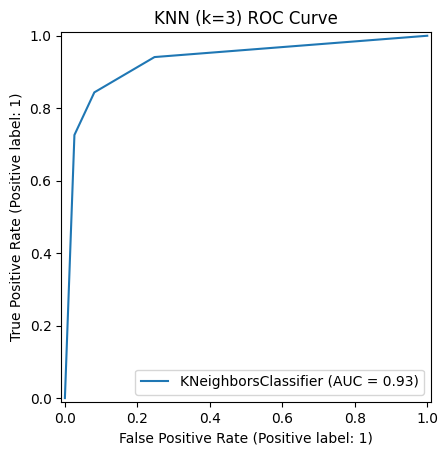


KNN (k=5) Results:
Accuracy: 0.8993
Precision: 0.8828
Recall: 0.8585
F1: 0.8705


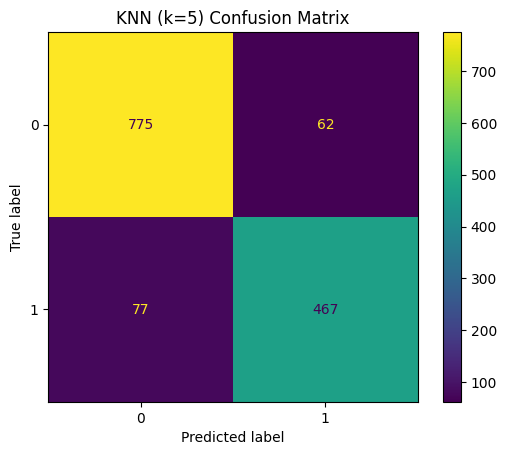

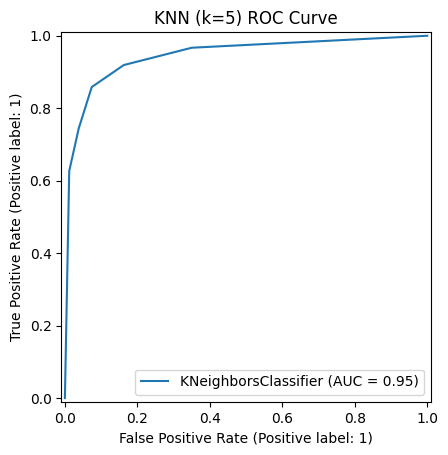


KNN (k=7) Results:
Accuracy: 0.8950
Precision: 0.8815
Recall: 0.8474
F1: 0.8641


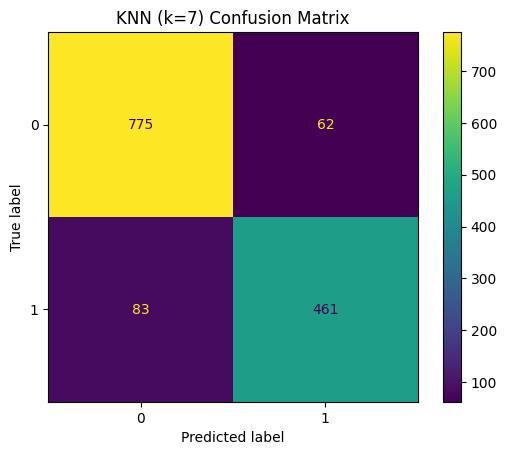

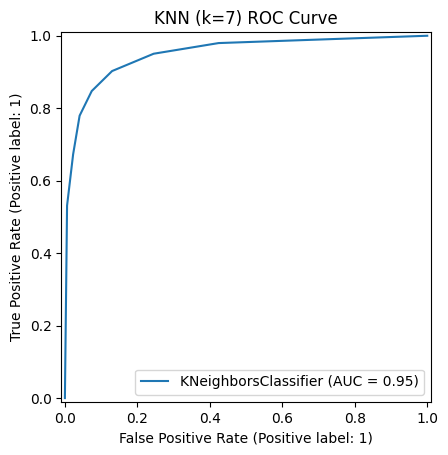


KNN Algorithms:

KNN (kd_tree) Results:
Accuracy: 0.8993
Precision: 0.8828
Recall: 0.8585
F1: 0.8705


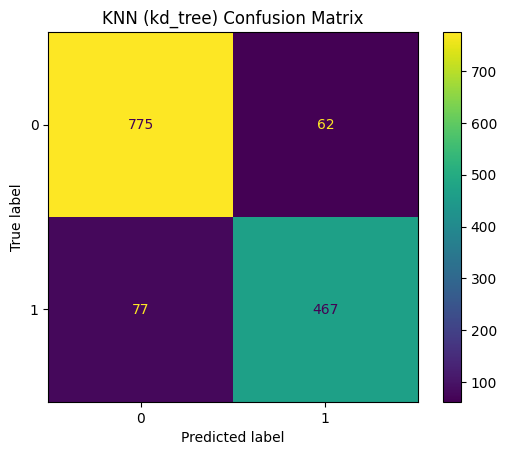

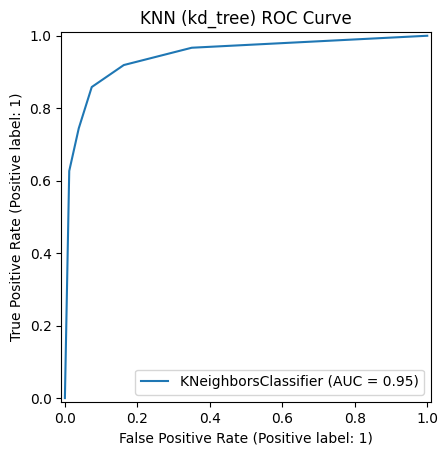


KNN (ball_tree) Results:
Accuracy: 0.8993
Precision: 0.8828
Recall: 0.8585
F1: 0.8705


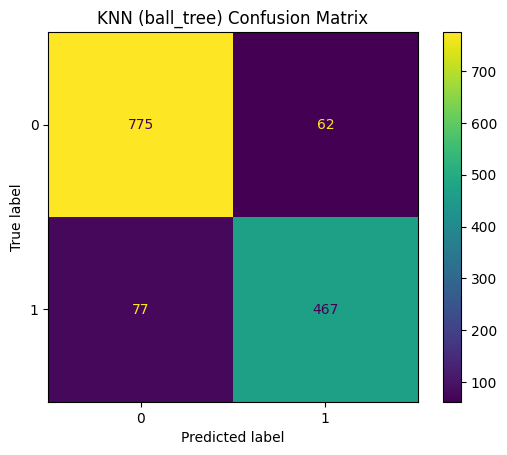

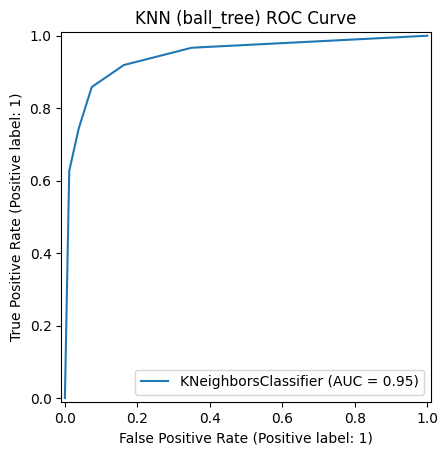


Cross Validation Results (5-fold):

Gaussian NB:
Mean Accuracy: 0.8159
Std Dev: 0.0137

KNN (k=5):
Mean Accuracy: 0.9007
Std Dev: 0.0086

Naive Bayes Comparison:
                Accuracy  Precision    Recall        F1
Gaussian NB     0.819696   0.700136  0.948529  0.805621
Multinomial NB  0.895004   0.942350  0.781250  0.854271
Bernoulli NB    0.889935   0.884314  0.829044  0.855787

KNN Comparison:
                 Accuracy  Precision    Recall        F1
KNN (k=1)        0.889935   0.855072  0.867647  0.861314
KNN (k=3)        0.889211   0.870968  0.843750  0.857143
KNN (k=5)        0.899348   0.882798  0.858456  0.870457
KNN (k=7)        0.895004   0.881453  0.847426  0.864105
KNN (kd_tree)    0.899348   0.882798  0.858456  0.870457
KNN (ball_tree)  0.899348   0.882798  0.858456  0.870457


In [ ]:
# ---------------------
# 1. Imports and Dataset
# ---------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, RocCurveDisplay,
                           ConfusionMatrixDisplay)

# Load dataset
df = pd.read_csv('/content/spambase_csv.csv')

# Add column names
columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
           'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
           'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
           'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
           'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
           'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
           'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
           'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
           'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
           'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
           'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
           'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
           'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',
           'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
           'capital_run_length_total', 'spam']
df.columns = columns

# ---------------------
# 2. EDA Visualizations
# ---------------------
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='spam', data=df)
plt.title('Class Distribution (0=Ham, 1=Spam)')
plt.show()

# Top correlated features
plt.figure(figsize=(10, 6))
corr = df.corr()['spam'].sort_values(ascending=False)[1:11]
sns.barplot(x=corr.values, y=corr.index)
plt.title('Top 10 Features Correlated with Spam')
plt.show()

S
top_features = df.corr()['spam'].abs().sort_values(ascending=False)[1:4].index
plt.figure(figsize=(12, 4))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='spam', y=feature, data=df)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# ---------------------
# 3. Data Preprocessing
# ---------------------
X = df.drop('spam', axis=1)
y = df['spam']

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ---------------------
# 4. Model Training and Evaluation
# ---------------------
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }

    # Print results
    print(f"\n{model_name} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba"):
        RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.title(f'{model_name} ROC Curve')
        plt.show()

    return metrics

# Initialize dictionaries to store results
nb_results = {}
knn_results = {}

# Naive Bayes Models
print("\nNaive Bayes Models:")
for name, model in [('Gaussian NB', GaussianNB()),
                   ('Multinomial NB', MultinomialNB()),
                   ('Bernoulli NB', BernoulliNB())]:
    nb_results[name] = evaluate_model(model, name)

# KNN Models
print("\nKNN Models:")
for k in [1, 3, 5, 7]:
    knn_results[f'KNN (k={k})'] = evaluate_model(KNeighborsClassifier(n_neighbors=k), f'KNN (k={k})')

# KNN Algorithms
print("\nKNN Algorithms:")
for algo in ['kd_tree', 'ball_tree']:
    knn_results[f'KNN ({algo})'] = evaluate_model(KNeighborsClassifier(n_neighbors=5, algorithm=algo), f'KNN ({algo})')

# ---------------------
# 5. Cross Validation
# ---------------------
print("\nCross Validation Results (5-fold):")
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for name, model in [('Gaussian NB', GaussianNB()),
                   ('KNN (k=5)', KNeighborsClassifier(n_neighbors=5))]:
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print(f"\n{name}:")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print(f"Std Dev: {scores.std():.4f}")

# ---------------------
# 6. Results Comparison
# ---------------------
print("\nNaive Bayes Comparison:")
print(pd.DataFrame.from_dict(nb_results, orient='index'))

print("\nKNN Comparison:")
print(pd.DataFrame.from_dict(knn_results, orient='index'))